<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>AUAI Exercise 2: AOI Simple Pipeline </h1></td>
    </tr>
  </tbody>
</table>

# Preparation of TensorFlow and AOI Dataset

## Step 1: Import TensorFlow & other libraries

In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.5.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2:Download AOI dataset to Colab from Google drive

https://drive.google.com/file/d/1Arcy_6pkMwLrg05A4f8S5dRzyu4I5j8Q/view?usp=sharing

In [3]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1Arcy_6pkMwLrg05A4f8S5dRzyu4I5j8Q',dest_path='./content', unzip=True)

Unzipping...Done.


## Step 3:Check input data 

In [5]:
import pandas as pd
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(2528, 2)


In [6]:
df_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [7]:
train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values
print(train_labels[:20])

[0 1 1 5 5 5 3 0 3 5 3 5 3 3 1 1 1 1 5 1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


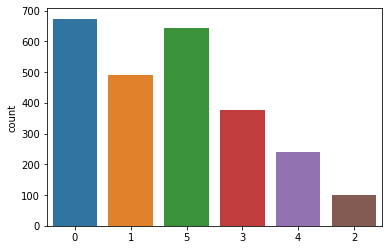

In [8]:
import seaborn as sns
g = sns.countplot(train_labels)

# IPO-M: Model

<img src="https://miro.medium.com/max/1571/1*XB4SlSGxGKFQbIBoil0aDg.png" alt="Pre-train models" width="500">

## Step 4:Load ImageNet CNN Model

In [8]:
num_classes=6

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [10]:
from tensorflow.keras.applications import InceptionResNetV2
model = InceptionResNetV2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
model.summary()

## Step 5: Compile model

In [11]:
#compile model using accuracy to measure model performance
#model.summary()
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=3e-3),
            metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# IPO-I: Encode input images

## Step 6: read train images

In [12]:
train_path = "train_images/"
train_images = []
from tensorflow.keras.preprocessing import image
for file in train_files:
    img = image.load_img(train_path+file, color_mode="rgb", target_size = (299, 299))
    train_images.append(img)
    if len(train_images)%100 == 0:
      print('.', end='')
print(len(train_images))

.........................2528


## Step 7: convert train images into np.array

In [13]:
arr = []
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input
for img in train_images:
    x = image.img_to_array(img)
    img_array = preprocess_input(x)
    arr.append(img_array)
X_train = np.array(arr)
print(X_train.shape)

(2528, 299, 299, 3)


# IPO-O: Encode output labes

## Step 8: convert train label into  onehot array

In [14]:
from tensorflow.keras.utils import to_categorical
# one-hot encoding
num_classes = 6
y_train = to_categorical(train_labels, num_classes)
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


## IPO-P: Model training

## Step 9: train our model 

In [15]:
#train the model
hist = model.fit(X_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
127/127 [==============================] - 83s 405ms/step - loss: 1.2324 - accuracy: 0.5870
Epoch 2/10
127/127 [==============================] - 51s 398ms/step - loss: 1.0929 - accuracy: 0.5969
Epoch 3/10
127/127 [==============================] - 51s 398ms/step - loss: 0.8093 - accuracy: 0.7077
Epoch 4/10
127/127 [==============================] - 51s 399ms/step - loss: 0.7081 - accuracy: 0.7579
Epoch 5/10
127/127 [==============================] - 51s 398ms/step - loss: 0.6101 - accuracy: 0.7872
Epoch 6/10
127/127 [==============================] - 51s 398ms/step - loss: 0.4917 - accuracy: 0.8350
Epoch 7/10
127/127 [==============================] - 51s 398ms/step - loss: 0.3550 - accuracy: 0.8782
Epoch 8/10
127/127 [==============================] - 51s 398ms/step - loss: 0.2710 - accuracy: 0.9173
Epoch 9/10
127/127 [==============================] - 51s 398ms/step - loss: 0.2907 - accuracy: 0.9043
Epoch 10/10
127/127 [==============================] - 51s 398ms/step - l

## Step 10: save our model 

In [16]:
model.save("AOI-inceptionv3-0812.h5")

# IPO-P: Model evaluation

## Step 11: Show training loss

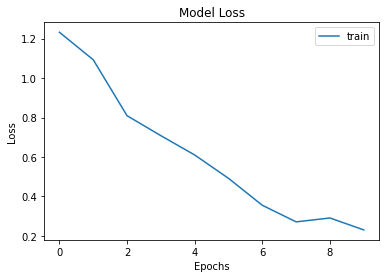

In [17]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

## Step 11: Show training accuracy

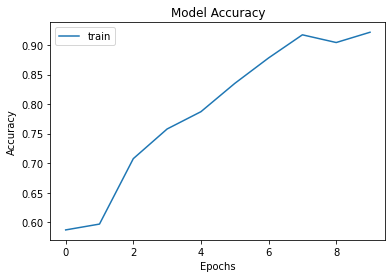

In [18]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

## Step 11: check the prediction for training set

In [19]:
y_prediction = model.predict(X_train, batch_size=20)
print(y_prediction[:2])

[[9.3477094e-01 4.5615914e-03 1.1843067e-02 4.6384610e-02 2.4355392e-03
  4.1517105e-06]
 [1.4488220e-05 9.9935752e-01 1.0907435e-06 2.7277239e-04 6.4438959e-06
  3.4763044e-04]]


In [20]:
predict = np.argmax(y_prediction,axis=1)
print(predict[0:10])

[0 1 1 5 5 5 3 0 1 5]


In [21]:
print(train_labels[:10])

[0 1 1 5 5 5 3 0 3 5]


## Step 12: Compute confusion matrix (混淆矩陣)

In [22]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(train_labels, predict)
print(confusion)

[[593  58   0  22   0   1]
 [  4 437   0   4   0  47]
 [  4   3  93   0   0   0]
 [  2   7   0 362   1   6]
 [  0   3   0  28 201   8]
 [  0   0   0   0   0 644]]


## Step 13: Plot the confusion matrix

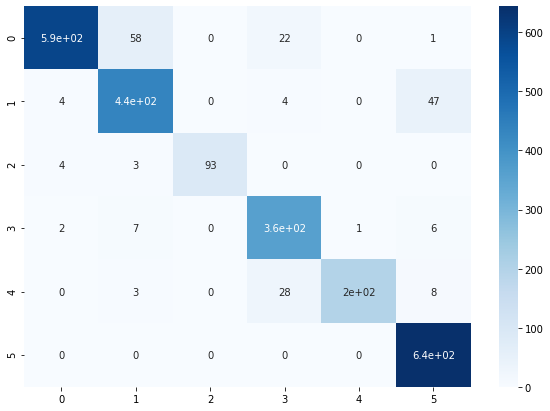

In [23]:
import seaborn as sn
df_cm = pd.DataFrame(confusion)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="Blues")

## Step 14: List overkills and underkills

In [24]:
overkill= []
underkill = []
for i in range(train_num):
  if train_labels[i] == 0 and predict[i] !=0:
    overkill.append(i)
  if train_labels[i] != 0 and predict[i] ==0:
    underkill.append(i)
print('# of overkill= {}; # of underkill= {} '.format(len(overkill), len(underkill)))

# of overkill= 81; # of underkill= 10 


## Step 15: Check overkills

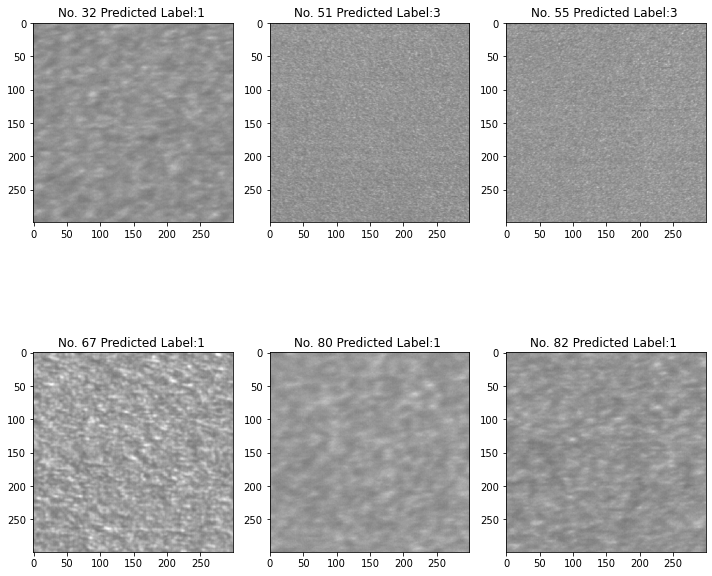

In [25]:
#overkill
overkill_num = len(overkill)
no = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        if no>=overkill_num:
          break 
        sel = overkill[no]
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Predicted Label:{} '.format(sel, predict[sel])) 
        no += 1
plt.tight_layout()

## Step 16: Check underkills

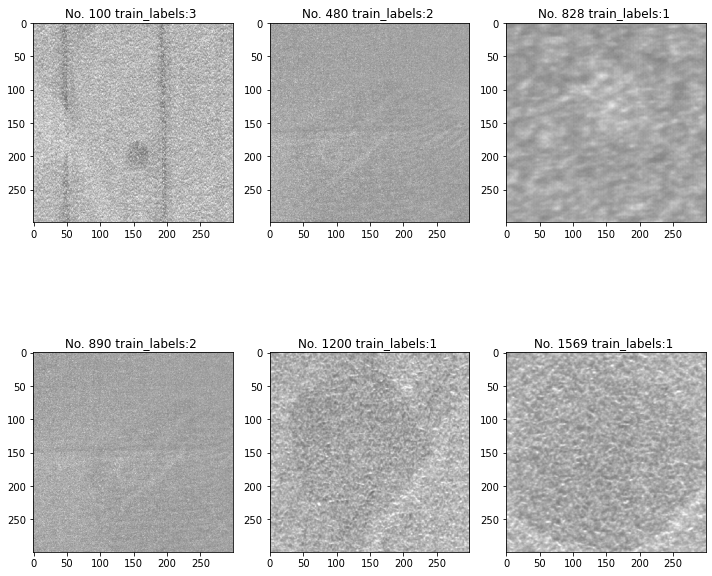

In [26]:
#underkill
underkill_num = len(underkill)
no = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        if no>=underkill_num:
          break 
        sel = underkill[no]
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} train_labels:{} '.format(sel, train_labels[sel])) 
        no += 1
plt.tight_layout()

## Step 17: Delete training data in memory

In [27]:
del train_images
del X_train
#Do GC
import gc
gc.collect()

14213

# Method 1 of input test data

# IPO-I: input test data

## Step 18:Check test data 

In [28]:
df_test = pd.read_csv("test.csv")
print(df_test.shape)

(10142, 2)


In [29]:
df_test.head()

,ID,Label
0,test_00000.png,NaN
1,test_00001.png,NaN
2,test_00002.png,NaN
3,test_00003.png,NaN
4,test_00004.png,NaN


## Step 19: Limit the number of test images for input of CNN model

In [38]:
#test_num = df_test.shape[0]
test_num = 2000 #limit the amount of training images for the class process
if test_num >= df_test.shape[0]:
  test_num = df_test.shape[0]

In [40]:
test_files  = df_test.iloc[:test_num,0].values
test_labels = df_test.iloc[:test_num,1].values
print(test_labels[:10])

[nan nan nan nan nan nan nan nan nan nan]


## Step 20: read test images

Note the limited number of test images for input of CNN model

In [41]:
len(test_files)

2000

In [42]:
test_path = "test_images/"
test_images = []
for file in test_files:
    img = image.load_img(test_path+file, color_mode="rgb", target_size = (299, 299))
    test_images.append(img)
    if len(test_images)%100 == 0:
      print('.', end='')
print(len(test_images))

....................2000


## Step 21: encode test images into np.array

In [43]:
arr = []
for img in test_images:
    x = image.img_to_array(img)
    img_array = preprocess_input(x)
    arr.append(img_array)
X_test = np.array(arr)
print(X_test.shape)

(2000, 299, 299, 3)


# IPO-O: output predictions for test images by our model

## Step 22: model.predict() for test images 

In [44]:
y_prediction = model.predict(X_test, batch_size=20)
predict = np.argmax(y_prediction,axis=1)
print(predict[:20])

[1 0 5 0 2 5 5 5 0 2 3 0 0 1 3 0 0 5 1 0]


## Step 23: write csv file for 

In [45]:
df_out = pd.DataFrame(predict)
df_out.shape

(2000, 1)

In [46]:
df_out.to_csv("result-20210812.csv", index=False)

# Method 2 of input test data

# Step 31: Load the test set 

In [47]:
df_test = pd.read_csv("test.csv",dtype=str)
print(df_test.shape)

(10142, 2)


In [48]:
df_test.head()

,ID,Label
0,test_00000.png,NaN
1,test_00001.png,NaN
2,test_00002.png,NaN
3,test_00003.png,NaN
4,test_00004.png,NaN


In [49]:
test_files  = df_test.iloc[:,0].values
test_labels = df_test.iloc[:,1].values
print(test_labels[:10])

[nan nan nan nan nan nan nan nan nan nan]


## Step 32: Instancing an ImageDataGenerator

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

## Step 33: Set up a test_generator with flow_from_dataframe

In [51]:
test_generator = img_gen.flow_from_dataframe(dataframe=df_test,
            directory="test_images",
            x_col="ID",
            y_col="Label",
            batch_size=32,
            shuffle=False,
            class_mode=None,
            target_size=(299,299))

Found 10142 validated image filenames.


## Step 34: step_size_test

In [54]:
if test_generator.n % test_generator.batch_size ==0:
  step_size_test=test_generator.n//test_generator.batch_size
else:
  step_size_test=test_generator.n//test_generator.batch_size + 1
print(step_size_test)

317


In [55]:
#y_predictions = model.predict(X_train, batch_size=20)
test_generator.reset()
y_predictions = model.predict_generator(generator=test_generator, steps=step_size_test,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


317/317 [==============================] - 57s 168ms/step


In [56]:
import numpy as np
predicts=np.argmax(y_predictions,axis=1)
predicts[:10]

array([1, 0, 5, 0, 2, 5, 5, 5, 0, 2])

## Step 35: Output test results

In [57]:
df_out = pd.DataFrame(df_test)
df_out.shape

(10142, 2)

In [58]:
df_out['Label'] = predicts
df_out.to_csv("submit-20210812.csv", index=False)